#  **1. Extract data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


# total 7 dataframe

In [ ]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/olist_customers_dataset.csv')

In [ ]:
order_items = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/olist_order_items_dataset.csv')

In [ ]:
order_payments = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/olist_order_payments_dataset.csv')

In [ ]:
order_review = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/olist_order_reviews_dataset.csv')

In [ ]:
orders_dataset = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/olist_orders_dataset.csv')

In [ ]:
product_dataset = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/olist_products_dataset.csv')

In [ ]:
product_name_translation = pd.read_csv('https://raw.githubusercontent.com/MinhThuanPhung/Brazilian-E-Commerce/refs/heads/main/product_category_name_translation.csv')

# **2. Data Cleaning and Exploratory Data Analysis (EDA)**



## **Data Cleaning**

In [ ]:
# List of dataframe
df_list = [customer_data,
           order_items,
           order_payments,
           order_review,
           orders_dataset,
           product_dataset,
           product_name_translation]
# list of dataframe name
df_list_name = ['customer_data',
                'order_items',
                'order_payments',
                'order_review',
                'orders_dataset',
                'product_dataset',
                'product_name_translation']

## **2.1 Remove unesscessary column**

There are some columns, we may not use them, so I delele it


*   Remove columns : product_name_lenght','product_description_lenght','product_photos_qty','product_length_cm','product_height_cm','product_width_cm' in product_datase
*   Remove column review_comment_title', 'review_comment_message and review_id in review_order




In [ ]:
## remove some column in product_dataset
product_dataset = product_dataset.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_length_cm','product_height_cm','product_width_cm'],axis=1)

In [ ]:
# remove review_comment_title and review_comment_message in order_review
order_review = order_review.drop(['review_comment_title','review_comment_message'],axis=1)

In [ ]:
# rmeove review_id in order_review
order_review = order_review.drop(['review_id'],axis=1)

## **2.2 Handling missing value**

In [ ]:
for df, name in zip(df_list, df_list_name):
    missing_values = df.isnull().sum()
    print(f"{name} missing values:\n{missing_values}\n")

customer_data missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

order_items missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_payments missing values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_review missing values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

orders_dataset missing values:
order_id                            0
customer_id                         0
order_status                     

**There are missing values in orders_dataset, product_dataset and order_review.**


*   Remove row has missing value in orders_dataset
*   fill missing value in product_weight by median
*   Remove row have missing value in product_category_name of  product_dataset



In [ ]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99224 non-null  object
 1   review_score             99224 non-null  int64 
 2   review_creation_date     99224 non-null  object
 3   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
# remove missing value in order_delivered_carrier_date, order_delivered_customer_date, order_approved_at in orders_dataset
orders_dataset = orders_dataset.dropna(subset=['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_approved_at'])

In [ ]:
# fill missing value in product_weight by median
product_dataset['product_weight_g'].fillna(product_dataset['product_weight_g'].median(), inplace=True)

<ipython-input-1879-d1b9bd81e22a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_dataset['product_weight_g'].fillna(product_dataset['product_weight_g'].median(), inplace=True)


In [ ]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32951 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


In [ ]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [ ]:
# checking duplicate
for df, name in zip(df_list, df_list_name):
    duplicates = df.duplicated().sum()
    print(f"{name} : {duplicates} duplicates.")

customer_data : 0 duplicates.
order_items : 0 duplicates.
order_payments : 0 duplicates.
order_review : 0 duplicates.
orders_dataset : 0 duplicates.
product_dataset : 0 duplicates.
product_name_translation : 0 duplicates.


**No duplicate in these dataframe**

In [ ]:
orders_dataset.order_id.nunique()

96461

In [ ]:
order_items.order_id.nunique()

98666

In [ ]:
order_payments.order_id.nunique()

99440

In [ ]:
order_review.order_id.nunique()

98673

**After checking order_id in each dataframe, we can see that number of order_id are different in each table. So we need to clean data make order_id is same in each table have this column**

In [ ]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99224 non-null  object
 1   review_score             99224 non-null  int64 
 2   review_creation_date     99224 non-null  object
 3   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
product_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32951 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


In [ ]:
product_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## **2.3 Join table**

### **2.3.1 product_dataset and product_name_translation**

In [ ]:
# join product_name_translation and product_dataset
product_dataset = pd.merge(product_dataset, product_name_translation, on='product_category_name', how='left')

In [ ]:
# remove product_catgory_name in product_dataset
product_dataset = product_dataset.drop(['product_category_name'],axis=1)

In [ ]:
# change name of product_category_name_english to product_category_name
product_dataset = product_dataset.rename(columns={'product_category_name_english': 'product_category_name'})

In [ ]:
# remove missing value in product_category_name of  product_dataset
product_dataset = product_dataset.dropna(subset=['product_category_name'])

In [ ]:
# delete table product_name_translation
del product_name_translation

### **2.3.2 order_review and orders_dataset**

In [ ]:
# order_review table, group by order_ID, review_score = average review_score of this order, get the fist line of review+creation_date and review_answer_timestamp if order has been reviewed more than 1

order_review = order_review.groupby('order_id').agg({
    'review_score': 'mean',
    'review_creation_date': 'first',
    'review_answer_timestamp': 'first'
}).reset_index()

In [ ]:
# join orders_Database and order_review
orders_dataset = pd.merge(orders_dataset, order_review, on='order_id', how='left')

In [ ]:
# remove null value of review_score
orders_dataset = orders_dataset.dropna(subset=['review_score'])

In [ ]:
# remove order_review table
del order_review

In [ ]:
# order have status canceled but still shipped to customer and delivered --> adjust status to delivered

# replace all canceled status have condition above  to delivered
condition = (
    (orders_dataset['order_status'] == 'canceled') &
    (orders_dataset['order_delivered_customer_date'].notna()) &
    (orders_dataset['order_delivered_carrier_date'].notna())
)

# update status thành 'delivered'
orders_dataset.loc[condition, 'order_status'] = 'delivered'

In [ ]:
# remove null value in review_score
orders_dataset = orders_dataset.dropna(subset=['review_score'])

### **2.3.3 orders_dataset, order_items and order_payment**

**For these table, we should not join them, instead of that, we keep order_ID which have in all tables**

In [ ]:
# filter common order_id in 2 table
common_order_ids = set(orders_dataset['order_id']) & set(order_payments['order_id']) & set(order_items['order_id'])

In [ ]:
# filter common order_id in  orders_dataset
orders_dataset = orders_dataset[orders_dataset['order_id'].isin(common_order_ids)]


In [ ]:
# filter common order_id in order_payments and order_items
order_payments = order_payments[order_payments['order_id'].isin(common_order_ids)]

In [ ]:
order_items = order_items[order_items['order_id'].isin(common_order_ids)]

## **2.4 Fixing data types**

Convert automaitcally data type (Most of them change from object to string) and conver column has date to datetime type

In [ ]:
customer_data = customer_data.convert_dtypes()
order_items= order_items.convert_dtypes()
order_payments = order_payments.convert_dtypes()
orders_dataset =  orders_dataset.convert_dtypes()
product_dataset = product_dataset.convert_dtypes()

In [ ]:
# change shipping_limit_date type from object to date_time
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')

In [ ]:
# convert date columns to datetime type
date_time_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date']
for col in date_time_cols:
  orders_dataset[col] = pd.to_datetime(orders_dataset[col], errors='coerce')

## **2.5 Adding columns**

### **2.5.1 Adding column in dataframe orders_database**

**There are 3 columns need to be added in dataframe orders_database**


*   delivert_time : Total time which customer received package, it calculated from order approved until it actually delivered to customer
*   Estimated_delivery_time: time from order approved until it estimated delivered
*   handling_time : calculate from order approved until it delivered to shiping carrier
* purchase_hour : which show the time customer place order
* weekday : show the days in week customer placed order
* time_slot : classify purchase_hour into 7 types

There are errors in data, so result may < 0 sometime, flexiblity, we can use order_pusechased_timestamp instead of order_approved at



In [ ]:
# add column show estimated_delivery_time
orders_dataset['delivery_time'] = (
    orders_dataset['order_delivered_customer_date'] - orders_dataset['order_approved_at']
)

#  # Step 2: delivery < 0
mask = orders_dataset['delivery_time'].dt.total_seconds() < 0
orders_dataset.loc[mask, 'delivery_time'] = (
      orders_dataset.loc[mask, 'order_delivered_customer_date'] - orders_dataset.loc[mask, 'order_purchase_timestamp'])

# Step 3: Change timedelta to dáy (round if hours > 12)
days = orders_dataset['delivery_time'].dt.days
hours = orders_dataset['delivery_time'].dt.components['hours']
orders_dataset['delivery_time'] = days + (hours > 12).astype(int)

# Step 4: change to Int64 (nullable)
orders_dataset['delivery_time'] = orders_dataset['delivery_time'].astype('Int64')

In [ ]:
# add column estimated_delivery_time in order_dataset (Delivery time is calculated from order was approved until it acutally delivered to customer

# add column show  estimated_delivery_time (Calculate from order was approve until it's  estimated delivery to customer)
orders_dataset['estimated_delivery_time'] = orders_dataset['order_estimated_delivery_date'] - orders_dataset['order_approved_at']

mask = orders_dataset['estimated_delivery_time'].dt.total_seconds() < 0
orders_dataset.loc[mask, 'estimated_delivery_time'] = (
      orders_dataset.loc[mask, 'order_estimated_delivery_date'] - orders_dataset.loc[mask, 'order_purchase_timestamp'])
#Use estimated_delivery_time for calculating days_2 and hours_2
days_2 = orders_dataset['estimated_delivery_time'].dt.days
hours_2 = orders_dataset['estimated_delivery_time'].dt.components['hours']

orders_dataset['estimated_delivery_time'] = days_2 + (hours_2 > 12).astype(int)
orders_dataset.estimated_delivery_time= orders_dataset.estimated_delivery_time.astype('Int64') # change to int type

In [ ]:
# add column show  handling time by seller (Calculate from order was approve until it delivered to carrier)
orders_dataset['handling_time'] = orders_dataset['order_delivered_carrier_date'] - orders_dataset['order_approved_at']

mask2 = orders_dataset['handling_time'].dt.total_seconds() < 0
orders_dataset.loc[mask2, 'handling_time'] = (
      orders_dataset.loc[mask2, 'order_delivered_carrier_date'] - orders_dataset.loc[mask2, 'order_purchase_timestamp'])
# Use handling_time for calculating days_2 and hours_2
days_2 = orders_dataset['handling_time'].dt.days
hours_2 = orders_dataset['handling_time'].dt.components['hours']

orders_dataset['handling_time'] = days_2 + (hours_2 > 12).astype(int)
orders_dataset.handling_time= orders_dataset.handling_time.astype('Int64')

In [ ]:
# add a column show the time customer placed order
orders_dataset['purchase_hour'] = orders_dataset['order_purchase_timestamp'].dt.strftime('%H:%M')

In [ ]:
# add column show days on the week - customer placed order
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['weekday'] = orders_dataset['order_purchase_timestamp'].dt.day_name()

In [ ]:
# add column clasify time customer purchase.
# late night : if 0 <= hour < 6
# Early Morning : 6 <= hour < 9:
# Morning :  9 <= hour < 12:
# Noon : 12 <= hour < 14
# afternoon : 14 <= hour < 17:
# Evening Peak : 17 <= hour < 20
# Late Evening : after 20

def marketing_time_slot(hour):
    hour = int(hour.split(':')[0])
    if 0 <= hour < 6:
        return "Late Night"
    elif 6 <= hour < 9:
        return "Early Morning"
    elif 9 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 14:
        return "Noon"
    elif 14 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 20:
        return "Evening Peak"
    else:
        return "Late Evening"

orders_dataset['time_slot'] = orders_dataset['purchase_hour'].apply(marketing_time_slot)

In [ ]:
orders_dataset=orders_dataset.convert_dtypes()

### **2.4.2 Adding columns in order_items**

Add 2 columns in order_items


*   Total_value = price + freight_value
*   total_item_order = get max order_item_id of order



In [ ]:
# add column total_value in dataframe order_items this is base cost and shipping cost of each item
order_items['total_value'] = order_items['price'] + order_items['freight_value']


In [ ]:
# add a column calculate total item in order
order_items['total_item_order'] = order_items.groupby('order_id')['order_item_id'].transform('max')
order_items['total_item_order'] = order_items.groupby('order_id')['total_item_order'].transform(
    lambda x: [x.iloc[0]] + [0]*(len(x)-1))

In [ ]:
order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value,total_value,total_item_order
count,109350.0,109350,109350.0,109350.0,109350.0,109350.000000
mean,1.19561,2018-01-08 21:42:39.689675008,119.866541,19.945356,139.811897,1.000000
min,1.0,2016-10-08 10:34:01,0.85,0.0,6.08,0.000000
25%,1.0,2017-09-21 16:10:12,39.9,13.08,55.1625,1.000000
50%,1.0,2018-01-29 01:17:03.500000,74.9,16.26,92.115,1.000000
75%,1.0,2018-05-11 04:15:01.500000,134.17,21.15,157.4775,1.000000
max,21.0,2020-04-09 22:35:08,6735.0,409.68,6929.31,21.000000
std,0.690522,NaN,181.10434,15.691023,188.095525,0.625479


### **2.4.3 Adding column in Customer_data**

In [ ]:
# classify customer location by state
# southest = ['SP', 'RJ', 'ES','MG']
# northest= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
# north =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
# midwest = ['MT', 'GO', 'MS' ,'DF' ]
# south = ['SC', 'RS', 'PR']

state_to_region = {
    # Southeast
    'SP': 'Southeast', 'RJ': 'Southeast', 'ES': 'Southeast', 'MG': 'Southeast',
    # Northeast
    'MA': 'Northeast', 'PI': 'Northeast', 'CE': 'Northeast', 'RN': 'Northeast',
    'PE': 'Northeast', 'PB': 'Northeast', 'SE': 'Northeast', 'AL': 'Northeast', 'BA': 'Northeast',
    # North
    'AM': 'North', 'RR': 'North', 'AP': 'North', 'PA': 'North',
    'TO': 'North', 'RO': 'North', 'AC': 'North',
    # Midwest
    'MT': 'Midwest', 'GO': 'Midwest', 'MS': 'Midwest', 'DF': 'Midwest',
    # South
    'SC': 'South', 'RS': 'South', 'PR': 'South'
}

customer_data['region'] = customer_data['customer_state'].map(state_to_region)

### **2.4.4 descriptive statistics of dataframe**

Checking if dataframe possiblely have outliers

In [ ]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,100063.0,100063.0,100063.0
mean,1.088574,2.849705,152.816247
std,0.654472,2.682012,213.19782
min,1.0,0.0,0.0
25%,1.0,1.0,56.78
50%,1.0,1.0,99.95
75%,1.0,4.0,171.06
max,26.0,24.0,13664.08


There are payment value = 0, replace by total value with corresponding orderID in order_items dataframe

In [ ]:
order_payments[order_payments.payment_value==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [ ]:
order_items[order_items.order_id =='8bcbe01d44d147f901cd3192671144db']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,total_item_order
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16,74.16,1


In [ ]:
order_items[order_items.order_id =='6ccb433e00daae1283ccc956189c82ae']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,total_item_order
47880,6ccb433e00daae1283ccc956189c82ae,1,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,2017-11-03 00:46:58,94.0,28.04,122.04,1


In [ ]:
order_items[order_items.order_id =='45ed6e85398a87c253db47c2d9f48216']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,total_item_order
30803,45ed6e85398a87c253db47c2d9f48216,1,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-06-15 21:30:18,56.99,14.15,71.14,1


In [ ]:
order_items[order_items.order_id =='b23878b3e8eb4d25a158f57d96331b18']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,total_item_order
78308,b23878b3e8eb4d25a158f57d96331b18,1,e306ca54c91b21392317d5b4632c9fe3,e49c26c3edfa46d227d5121a6b6e4d37,2017-06-01 19:35:17,135.3,36.27,171.57,1


In [ ]:
# replace payment_value = 74.16  for order 8bcbe01d44d147f901cd3192671144db in order_payment
order_payments.loc[order_payments['order_id'] == '8bcbe01d44d147f901cd3192671144db', 'payment_value'] = 74.16


In [ ]:
# replace payment_value = 122.04  for order da20530872245d6cd9d2f5725613c430 in order_payment
order_payments.loc[order_payments['order_id'] == '6ccb433e00daae1283ccc956189c82ae', 'payment_value'] = 122.04

In [ ]:
# replace payment_value = 71.14	  for order 45ed6e85398a87c253db47c2d9f48216 in order_payment
order_payments.loc[order_payments['order_id'] == '45ed6e85398a87c253db47c2d9f48216', 'payment_value'] = 71.14

In [ ]:
# replace payment_value = 171.57	  for order b23878b3e8eb4d25a158f57d96331b18 in order_payment
order_payments.loc[order_payments['order_id'] == 'b23878b3e8eb4d25a158f57d96331b18', 'payment_value'] = 171.57

In [ ]:
order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value,total_value,total_item_order
count,109350.0,109350,109350.0,109350.0,109350.0,109350.000000
mean,1.19561,2018-01-08 21:42:39.689675008,119.866541,19.945356,139.811897,1.000000
min,1.0,2016-10-08 10:34:01,0.85,0.0,6.08,0.000000
25%,1.0,2017-09-21 16:10:12,39.9,13.08,55.1625,1.000000
50%,1.0,2018-01-29 01:17:03.500000,74.9,16.26,92.115,1.000000
75%,1.0,2018-05-11 04:15:01.500000,134.17,21.15,157.4775,1.000000
max,21.0,2020-04-09 22:35:08,6735.0,409.68,6929.31,21.000000
std,0.690522,NaN,181.10434,15.691023,188.095525,0.625479


In [ ]:
# replace total_item_order = 0 by median
median_total_item_order = order_items['total_item_order'].median()
order_items['total_item_order'] = order_items['total_item_order'].replace(0, median_total_item_order)

In [ ]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,100063.0,100063.0,100063.0
mean,1.088574,2.849705,152.828696
std,0.654472,2.682012,213.193227
min,1.0,0.0,0.01
25%,1.0,1.0,56.78
50%,1.0,1.0,99.96
75%,1.0,4.0,171.08
max,26.0,24.0,13664.08


## **2.6. Download cleaned_CSV to import PowerBI and make a dashboard**

In [ ]:
# order_payments.to_csv('order_payments_clean.csv', index=False)
# from google.colab import files
# files.download('order_payments_clean.csv')

In [ ]:
# product_dataset.to_csv('product_dataset_clean.csv', index=False)
# from google.colab import files
# files.download('product_dataset_clean.csv')

In [ ]:
# customer_data.to_csv('customer_data_clean.csv', index=False)
# from google.colab import files
# files.download('customer_data_clean.csv')

In [ ]:
# order_items.to_csv('order_items_clean.csv', index=False)
# from google.colab import files
# files.download('order_items_clean.csv')

In [ ]:
# orders_dataset.to_csv('orders_dataset_clean.csv', index=False)
# from google.colab import files
# files.download('orders_dataset_clean.csv')

##**Exploratory Data Analysis (EDA)**


## **Sales correlation and other factors**

##**2.7 Creating a new dataframe for checking correlation**

**Merge dataframe**



* df is dataframe  which  order_items join in product_dataset

* df1 is dataframe which order_dataset join in customer_data

* df2 is dataframe whwich df1 join in order_ítems

* sales_df is dataframe which merge all tables together to check correlation between variables


In [ ]:
# merge order_items with product_dataset
df = order_items.merge(product_dataset, on='product_id', how='left')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109350 entries, 0 to 109349
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               109350 non-null  string        
 1   order_item_id          109350 non-null  Int64         
 2   product_id             109350 non-null  string        
 3   seller_id              109350 non-null  string        
 4   shipping_limit_date    109350 non-null  datetime64[ns]
 5   price                  109350 non-null  Float64       
 6   freight_value          109350 non-null  Float64       
 7   total_value            109350 non-null  Float64       
 8   total_item_order       109350 non-null  int64         
 9   product_weight_g       107804 non-null  Int64         
 10  product_category_name  107804 non-null  string        
dtypes: Float64(3), Int64(2), datetime64[ns](1), int64(1), string(4)
memory usage: 9.7 MB


In [ ]:
# #download df
# df.to_csv('df.csv', index=False)
# from google.colab import files
# files.download('df.csv')


In [ ]:
# create a new dataframe named grouped_df which group by orderID, calculate mean of price, freight_value, product_weight and get the first line of total product_item, and sum of total value

sales_df = df.groupby('order_id').agg({
    'price': 'mean',
    'total_item_order': 'first',
    'freight_value': 'mean',
    'product_weight_g': 'mean',
    'total_value': 'sum'

}).reset_index()

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95814 entries, 0 to 95813
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          95814 non-null  string 
 1   price             95814 non-null  Float64
 2   total_item_order  95814 non-null  int64  
 3   freight_value     95814 non-null  Float64
 4   product_weight_g  94472 non-null  Float64
 5   total_value       95814 non-null  Float64
dtypes: Float64(4), int64(1), string(1)
memory usage: 4.8 MB


In [ ]:
# merge customer_data with orders_dataset - df1 then merge it with grouped_df
df1 = orders_dataset.merge(customer_data, on='customer_id', how='left')
sales_df = sales_df.merge(df1, on='order_id', how='outer')

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95814 entries, 0 to 95813
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95814 non-null  string        
 1   price                          95814 non-null  Float64       
 2   total_item_order               95814 non-null  int64         
 3   freight_value                  95814 non-null  Float64       
 4   product_weight_g               94472 non-null  Float64       
 5   total_value                    95814 non-null  Float64       
 6   customer_id                    95814 non-null  string        
 7   order_status                   95814 non-null  string        
 8   order_purchase_timestamp       95814 non-null  datetime64[ns]
 9   order_approved_at              95814 non-null  datetime64[ns]
 10  order_delivered_carrier_date   95814 non-null  datetime64[ns]
 11  order_delivered

In [ ]:
# fill Na of product_weight by median
sales_df['product_weight_g'].fillna(sales_df['product_weight_g'].median(), inplace=True)

<ipython-input-1947-1d1f4c612882>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['product_weight_g'].fillna(sales_df['product_weight_g'].median(), inplace=True)


## **2.8 Cleaning sales_df dataframe**



*   Remove unessary columns
*   checking describe sales



In [ ]:
# delete columns customer_zip_code_prefix, customer_city, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date , review_answer_timestamp , review_creation_date , order_approved_at
columns_to_drop = [
    'order_id',
    'customer_id',
    'customer_zip_code_prefix',
    'customer_city',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_answer_timestamp',
    'review_creation_date',
    'order_approved_at',
    'order_purchase_timestamp',
    'order_status',
    'customer_unique_id',
    'customer_state',
    'purchase_hour',
    'handling_time',
    'customer_state',
    'region',
    'weekday',
    'time_slot',
    'estimated_delivery_time'

]

sales_df = sales_df.drop(columns=columns_to_drop)


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95814 entries, 0 to 95813
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             95814 non-null  Float64
 1   total_item_order  95814 non-null  int64  
 2   freight_value     95814 non-null  Float64
 3   product_weight_g  95814 non-null  Float64
 4   total_value       95814 non-null  Float64
 5   review_score      95814 non-null  Float64
 6   delivery_time     95814 non-null  Int64  
dtypes: Float64(5), Int64(1), int64(1)
memory usage: 5.7 MB


In [ ]:
sales_df.describe()

,price,total_item_order,freight_value,product_weight_g,total_value,review_score,delivery_time
count,95814.0,95814.000000,95814.0,95814.0,95814.0,95814.0,95814.0
mean,125.042045,1.141274,20.141744,2080.812006,159.563643,4.156018,12.048845
std,188.308989,0.534098,15.675524,3720.758069,217.502813,1.283761,9.428425
min,0.85,1.000000,0.0,0.0,9.59,1.0,0.0
25%,41.9,1.000000,13.37,300.0,61.8,4.0,6.0
50%,79.0,1.000000,16.35,700.0,105.275,5.0,10.0
75%,139.9,1.000000,21.15,1800.0,176.16,5.0,15.0
max,6735.0,21.000000,409.68,40425.0,13664.08,5.0,208.0


In [ ]:
non_zero_median = sales_df.loc[sales_df['product_weight_g'] > 0, 'product_weight_g'].median()

# Replace value = 0
sales_df['product_weight_g'] = sales_df['product_weight_g'].replace(0, non_zero_median)

In [ ]:

# replace delivery_time = 0 and estimated_delivery_time = 0 by median
median_delivery_time = sales_df['delivery_time'].median()
sales_df['delivery_time'] = sales_df['delivery_time'].apply(lambda x: median_delivery_time if x == 0 else x)

In [ ]:
sales_df.describe()

,price,total_item_order,freight_value,product_weight_g,total_value,review_score,delivery_time
count,95814.0,95814.000000,95814.0,95814.0,95814.0,95814.0,95814.000000
mean,125.042045,1.141274,20.141744,2080.855841,159.563643,4.156018,12.056464
std,188.308989,0.534098,15.675524,3720.737678,217.502813,1.283761,9.422724
min,0.85,1.000000,0.0,2.0,9.59,1.0,1.000000
25%,41.9,1.000000,13.37,300.0,61.8,4.0,6.000000
50%,79.0,1.000000,16.35,700.0,105.275,5.0,10.000000
75%,139.9,1.000000,21.15,1800.0,176.16,5.0,15.000000
max,6735.0,21.000000,409.68,40425.0,13664.08,5.0,208.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95814 entries, 0 to 95813
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             95814 non-null  Float64
 1   total_item_order  95814 non-null  int64  
 2   freight_value     95814 non-null  Float64
 3   product_weight_g  95814 non-null  Float64
 4   total_value       95814 non-null  Float64
 5   review_score      95814 non-null  Float64
 6   delivery_time     95814 non-null  float64
dtypes: Float64(5), float64(1), int64(1)
memory usage: 5.6 MB


In [ ]:
# de_type, change all data type to int, some are float change to int
int_cols = sales_df.select_dtypes(include=['Float64']).columns
for col in int_cols:
    sales_df[col] = sales_df[col].astype(int)

## **2.9 Creating a heatmap to check correlation**

### 📌**Sales and product, location, delivery correlation**

In [ ]:
correlation_matrix_sale = sales_df.corr()
correlation_matrix_sale.head()

,price,total_item_order,freight_value,product_weight_g,total_value,review_score,delivery_time
price,1.000000,-0.058685,0.422091,0.342349,0.920329,-0.005068,0.058826
total_item_order,-0.058685,1.000000,-0.026682,-0.003666,0.189544,-0.123438,-0.021952
freight_value,0.422091,-0.026682,1.000000,0.615871,0.459865,-0.034887,0.214509
product_weight_g,0.342349,-0.003666,0.615871,1.000000,0.366847,-0.028996,0.079576
total_value,0.920329,0.189544,0.459865,0.366847,1.000000,-0.042030,0.066875


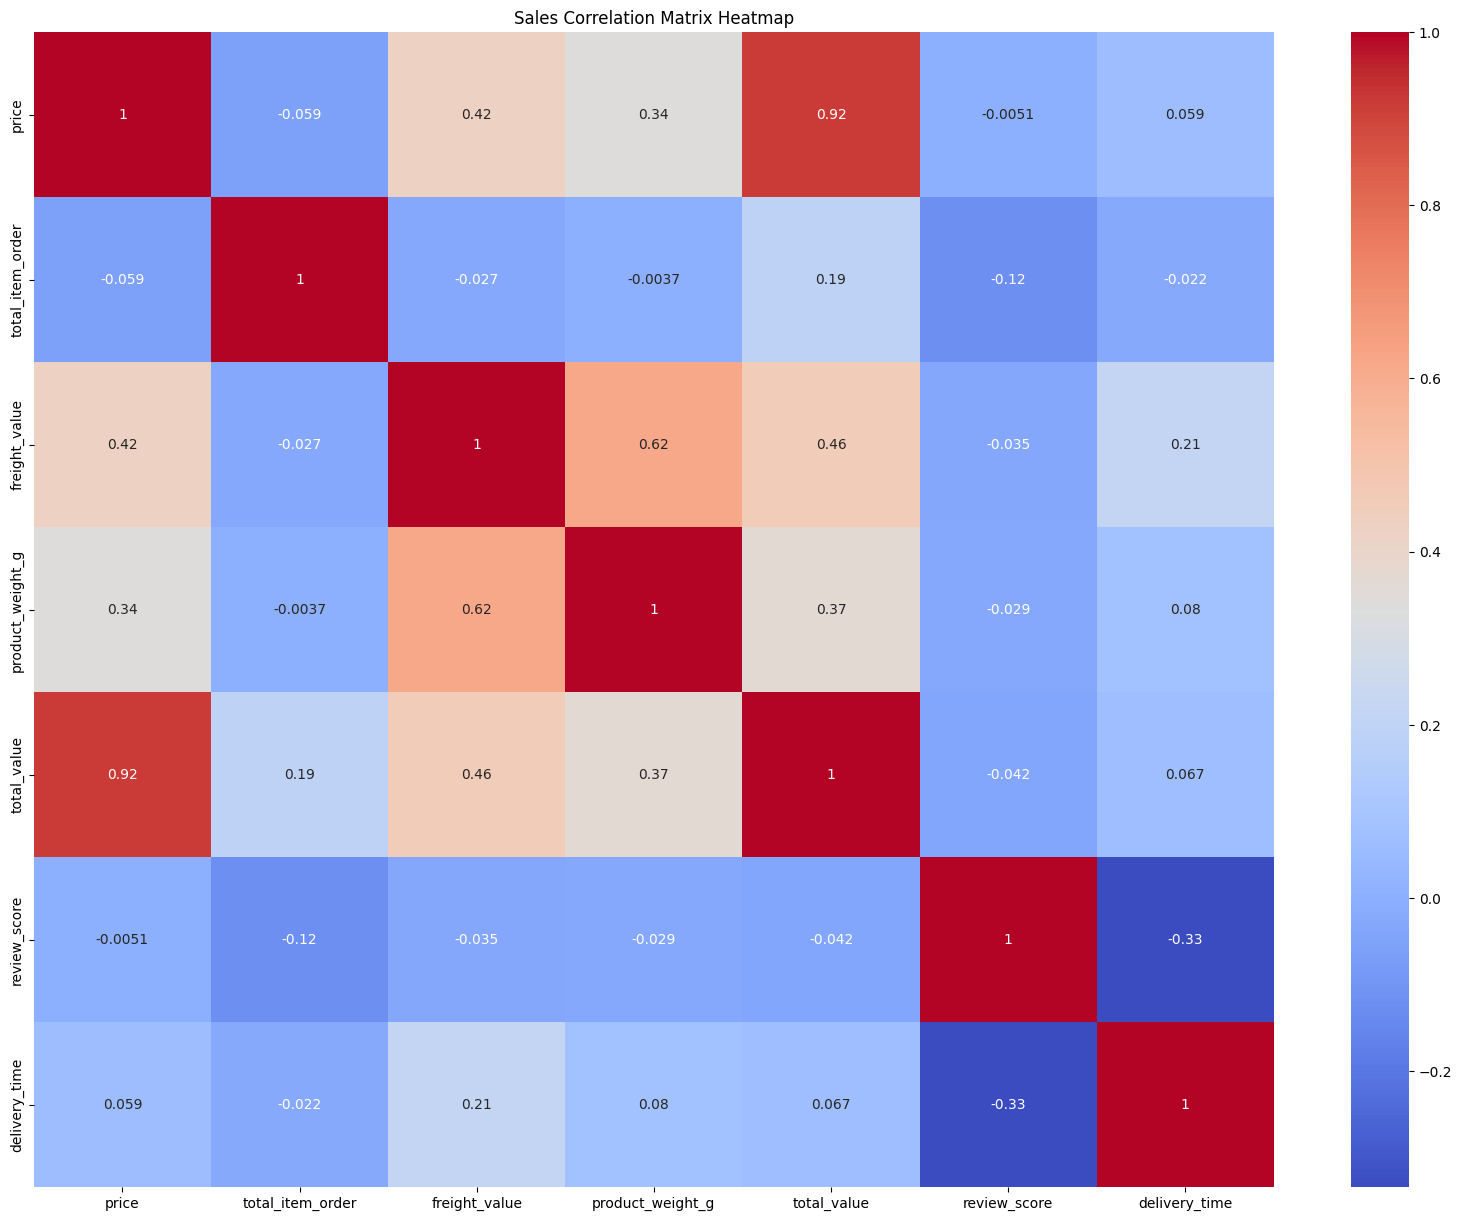

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_sale, annot=True, cmap='coolwarm')
plt.title('Sales Correlation Matrix Heatmap')

plt.show()

#### 💡**Insights**



* price and total_value show a very strong positive correlation: 0.92. This makes sense, as price is a major component of the total order value. The more expensive items sold, it contribute more to total revenue

* total_item_order and total_value: 0.94. The more items ordered, the higher the total order value.

* product_weight_g and freight_value: 0.78. Heavier products tend to incur higher shipping costs.

* product_weight_g and total_value: 0.70. Heavier products are often more expensive, contributing to a higher total value.



###**📌 Correlation between Returning customer rate (RCR) and other factors**

**# We divide customer into 2 groups**

Retained (returned more than 1)

Not retained (buy one time only)



In [ ]:
# df1 is dataframe which merge order_dataset with customer_dataset
# merge df1 with order_items
df2 = df1.merge(order_items, on='order_id', how='left')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109350 entries, 0 to 109349
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109350 non-null  string        
 1   customer_id                    109350 non-null  string        
 2   order_status                   109350 non-null  string        
 3   order_purchase_timestamp       109350 non-null  datetime64[ns]
 4   order_approved_at              109350 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109350 non-null  datetime64[ns]
 6   order_delivered_customer_date  109350 non-null  datetime64[ns]
 7   order_estimated_delivery_date  109350 non-null  datetime64[ns]
 8   review_score                   109350 non-null  Float64       
 9   review_creation_date           109350 non-null  string        
 10  review_answer_timestamp        109350 non-null  string        
 11  

In [ ]:
# count number of order by each customer
order_counts = df2.groupby('customer_unique_id').size()

# Khách retained nếu mua > 1 lần
retained_customers = order_counts[order_counts > 1].index

# Gán nhãn retained
df2['is_retained'] = df2['customer_unique_id'].isin(retained_customers).astype(int)

In [ ]:
retained_df = df2.groupby('customer_unique_id').agg({
    'is_retained': 'first',
    'order_id': 'count',
    'total_item_order': 'first',
    'price': 'sum',
    'freight_value': 'sum',
    'review_score': 'mean',
    'delivery_time': 'mean'

}).rename(columns={'order_id': 'total_orders'})

In [ ]:
retained_df.describe()

,is_retained,total_orders,total_item_order,price,freight_value,review_score,delivery_time
count,92738.000000,92738.000000,92738.000000,92738.0,92738.0,92738.0,92738.0
mean,0.123790,1.179128,1.138832,141.33803,23.518134,4.153171,12.05728
std,0.329343,0.615358,0.528632,214.42382,22.73889,1.280771,9.42884
min,0.000000,1.000000,1.000000,0.85,0.0,1.0,0.0
25%,0.000000,1.000000,1.000000,47.65,14.06,4.0,6.0
50%,0.000000,1.000000,1.000000,89.64,17.6,5.0,10.0
75%,0.000000,1.000000,1.000000,153.9,25.47,5.0,15.0
max,1.000000,24.000000,21.000000,13440.0,1794.96,5.0,208.0


In [ ]:
# retained_corr_matrix = agg_data.corr()
retained_corr_matrix = retained_df.corr()

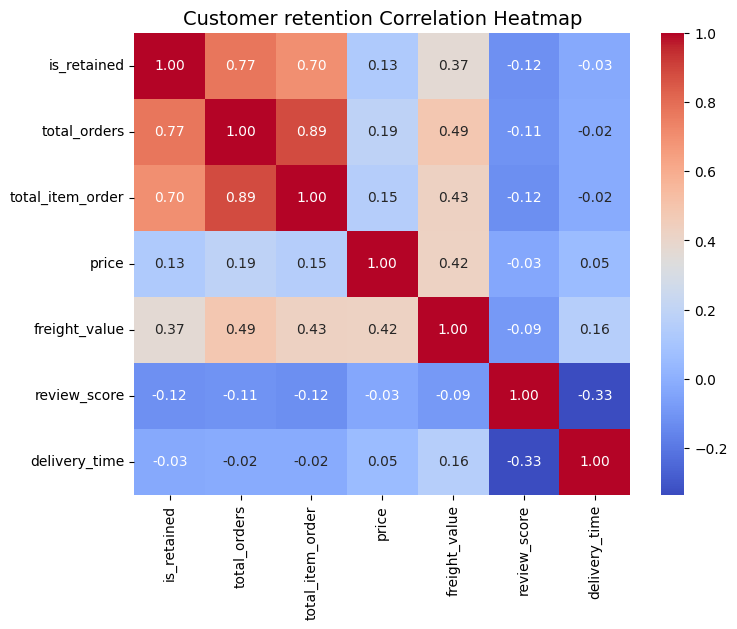

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(retained_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Customer retention Correlation Heatmap", fontsize=14)
plt.show()

####**💡Insight**

- total_orders with customer retention (0.77): Customers with more total orders are more likely to be retained.

- total_item_order with customer retention (0.70): Customers ordering more items are more likely to stay.

- freight_value with customer retention (0.37): Higher shipping value has a moderate positive correlation with retention.
- review_score has a moderate negative correlation with delivery_time (-0.33), which makes sense—longer delivery often leads to lower review scores.

#**3. RFM Analysis**

### RFM stands for Recency - Frequency - Monetary Value, I will be using this metrics to segment customers

##**3.1 create a dataframe include Recency, Frequency and Monetary**

In [ ]:
# merge df1 with orders_payment
df3 = df1.merge(order_payments, on='order_id', how='left')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100063 entries, 0 to 100062
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100063 non-null  string        
 1   customer_id                    100063 non-null  string        
 2   order_status                   100063 non-null  string        
 3   order_purchase_timestamp       100063 non-null  datetime64[ns]
 4   order_approved_at              100063 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100063 non-null  datetime64[ns]
 6   order_delivered_customer_date  100063 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100063 non-null  datetime64[ns]
 8   review_score                   100063 non-null  Float64       
 9   review_creation_date           100063 non-null  string        
 10  review_answer_timestamp        100063 non-null  string        
 11  

In [ ]:
df3['order_purchase_timestamp'] = pd.to_datetime(df3['order_purchase_timestamp'])
recent_order_date = df3['order_purchase_timestamp'].dt.date.max() +pd.Timedelta(days=1)
#Have negative value so +1 days )


In [ ]:
# Create RFM dataframe which group by customer_unique_id, max order_purchase_timestamp,
rfm_df = df3.groupby("customer_unique_id").agg({
    # Calculate Recency using the recent_order_timestamp and the maximum timestamp for each customer

    'order_purchase_timestamp': lambda x: (pd.Timestamp(recent_order_date) - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()
rfm_df.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92738 entries, 0 to 92737
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  92738 non-null  string 
 1   Recency             92738 non-null  int64  
 2   Frequency           92738 non-null  int64  
 3   Monetary            92738 non-null  Float64
dtypes: Float64(1), int64(2), string(1)
memory usage: 2.9 MB


In [ ]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [ ]:
# create column R_score, F_score, M_score depending%
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Create RFM segment
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92738 entries, 0 to 92737
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  92738 non-null  string  
 1   Recency             92738 non-null  int64   
 2   Frequency           92738 non-null  int64   
 3   Monetary            92738 non-null  Float64 
 4   R_score             92738 non-null  category
 5   F_score             92738 non-null  category
 6   M_score             92738 non-null  category
 7   RFM_Score           92738 non-null  object  
dtypes: Float64(1), category(3), int64(2), object(1), string(1)
memory usage: 3.9+ MB


In [ ]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.9,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214


In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,92738.000000,92738.000000,92738.0
mean,237.312698,1.078986,164.900017
std,152.589436,0.449319,225.012373
min,0.000000,1.000000,9.59
25%,114.000000,1.000000,63.0
50%,218.000000,1.000000,107.78
75%,346.000000,1.000000,182.1675
max,695.000000,33.000000,13664.08


##**3.2 Classify customer type based on RMF score**

In [ ]:
def rfm_segment(row):
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif f >= 4 and r >= 2:
        return 'Loyal Customers'
    elif r == 5 and f <= 2:
        return 'New Customers'
    elif r <= 2 and f >= 3:
        return 'At Risk'
    else:
        return 'Low-Value'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

In [ ]:
# join rfm with customer_data
customer_data1 = customer_data.groupby('customer_unique_id').first().reset_index()
rfm_df = rfm_df.merge(customer_data1, on='customer_unique_id', how='left')

In [ ]:
# remove column rfm_df, customer_zip_code_prefix, customer_city,customer_id


rfm_df = rfm_df.drop(['customer_zip_code_prefix', 'customer_city','customer_id'],axis = 1)


In [ ]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment,customer_state_x,region_x,customer_state_y,region_y
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.9,4,1,4,414,Low-Value,SP,Southeast,SP,Southeast
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411,Low-Value,SP,Southeast,SP,Southeast
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,112,Low-Value,SC,South,SC,South
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,211,Low-Value,PA,North,PA,North
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,214,Low-Value,SP,Southeast,SP,Southeast


In [ ]:
# # downloadd fil rfm_df to scv file
# rfm_df.to_csv('rfm_df_new', index=False)
# from google.colab import files
# files.download('rfm_df_new')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>